In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import h5py
from caiman import mmapping as mmp
import numpy as np
from tqdm import tqdm
from matplotlib.pyplot import *
import h5py as hd

In [4]:
folder = '/Volumes/My_Passport/MiniscopeMovies/1_24_2019/GRIN_011_ACHf20/H10_M19_S59_ms9/'
mmap = 'memmap_0008_d1_480_d2_752_d3_1_order_C_frames_1000_.mmap'

In [5]:
Yr, dims, T = mmp.load_memmap(folder+mmap)

In [6]:
Yr_array = np.array(Yr)

In [7]:
np.shape(Yr_array)

(360960, 1000)

In [8]:
np.shape(Yr_array[:,500:700])

(360960, 200)

In [20]:
# save subsection to mmap file
save_name = 'memmap_0012_d1_480_d2_752_d3_1_order_C_frames_200_.mmap'
movie_slice = np.memmap(folder+save_name, mode='w+', dtype=np.float32, shape=(360960, 200), order='C')

In [21]:
movie_slice[:] = Yr_array[:,500:700]

In [22]:
np.shape(movie_slice)

(360960, 200)

In [23]:
movie_slice

memmap([[20.0001, 19.0001, 19.0001, ..., 17.0001, 16.0001, 17.0001],
        [15.0001, 17.0001, 18.0001, ..., 13.0001, 16.0001, 19.0001],
        [19.0001, 19.0001, 20.0001, ..., 23.0001, 18.0001, 18.0001],
        ...,
        [30.0001, 34.0001, 27.0001, ..., 27.0001, 30.0001, 30.0001],
        [27.0001, 30.0001, 31.0001, ..., 26.0001, 30.0001, 23.0001],
        [25.0001, 26.0001, 25.0001, ..., 25.0001, 23.0001, 25.0001]],
       dtype=float32)

In [10]:
dims

(480, 752)

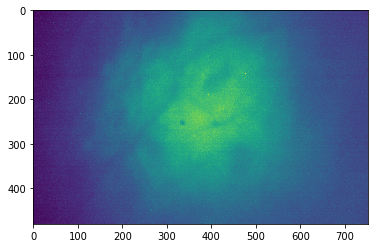

In [17]:
imshow(Yr_array[:,1].reshape([dims[1],dims[0]]).transpose())
show()

In [21]:
# write to .hdf5
movie_by_frames = []
for frame in tqdm(range(np.shape(Yr_array)[1])):
    movie_by_frames.append(Yr_array[:, frame].reshape([dims[1],dims[0]]).transpose())

output_file = hd.File(folder + mmap.rstrip('.mmap')+'_resized.h5', "w")
movie = output_file.create_dataset('motion_corrected', data = movie_by_frames)
output_file.close()

100%|██████████| 1000/1000 [00:00<00:00, 482936.56it/s]
